This example gives the basic usage of the package. Here, we simply demonstrate its usage by using some functions of the package.

It shall include:
- Read spectrum files;
- Export spectrum files;
- Simple analysis steps.


First, we import some util modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gamspec import SimulatedSpectrum as SimulatedSpectrum

import gamspec.operators.Smoother as Smoother
import gamspec.operators.PeakSearcher as PeakSearcher
import gamspec.operators.AreaCalculator as AreaCalculator
import gamspec.operators.OtherOperator as OtherOperator

We generate a simulated spectrum using arbitary parameters. It is a spectrum with only one peak.

<Axes: >

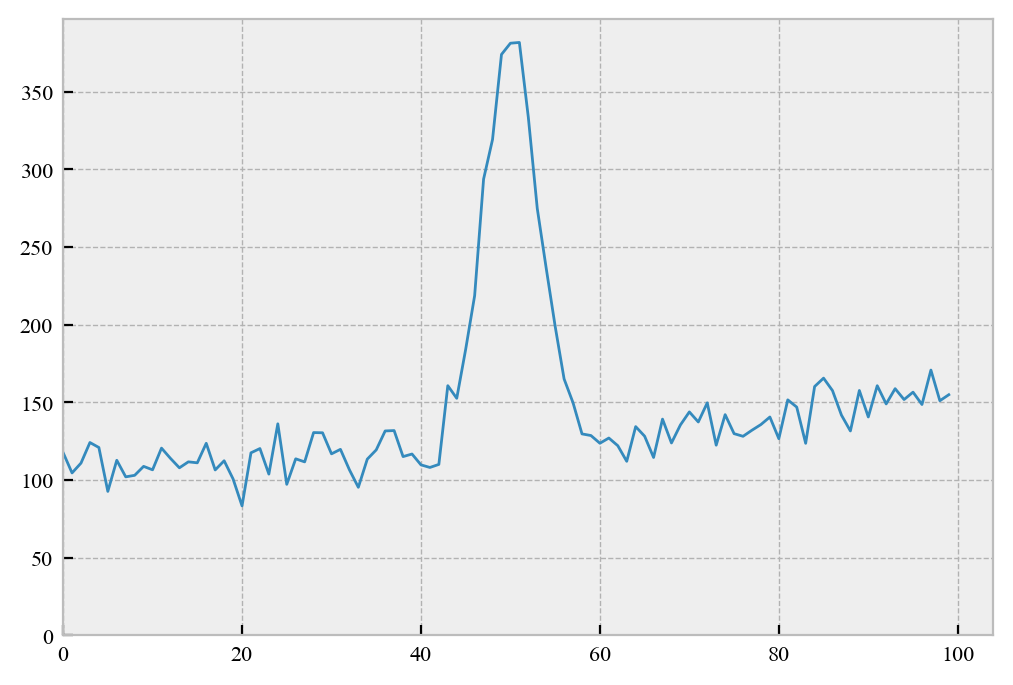

In [2]:
simulated = SimulatedSpectrum(base_intensity=100, base_amplitude=50)
simulated.plot()

We define some basic operators to analyze the simulated spectrum.

In [3]:
cen = Smoother.CentroidSmoother(order=2)
strip = OtherOperator.SNIPStripper(order=8)
gauss = PeakSearcher.GaussPeakSearcher(order=2, threshold=0.4)
cal = AreaCalculator.AverageClassicPeakAreaCalculator(times=2)

We smooth the spectrum using 2nd order centroid smoother and visualize it with unsmoothed spectrum. Calling of operators requies a list od spectrum, since smoother only accepts one spectrum as input, we embed the simulated specrum into a list and pass it in to smoother.

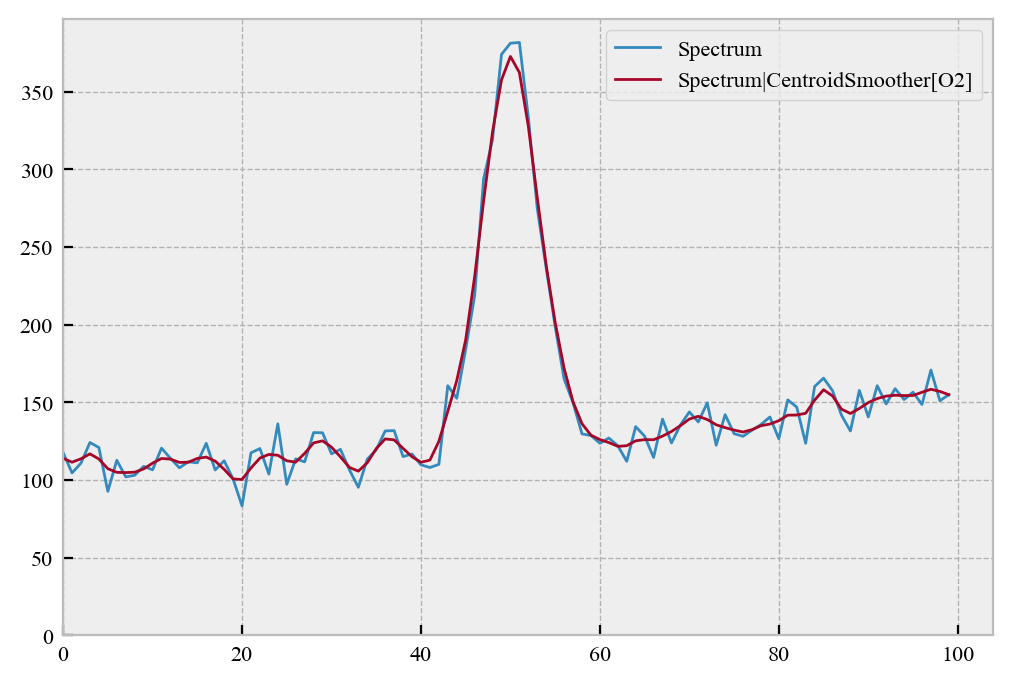

In [4]:
smoothed = cen([simulated])
simulated.plot()
smoothed.plot()
plt.legend()

The baseline can be striped using SNIP stripper. And then peaks can be extracted by minusing the baseline from the spectrum.

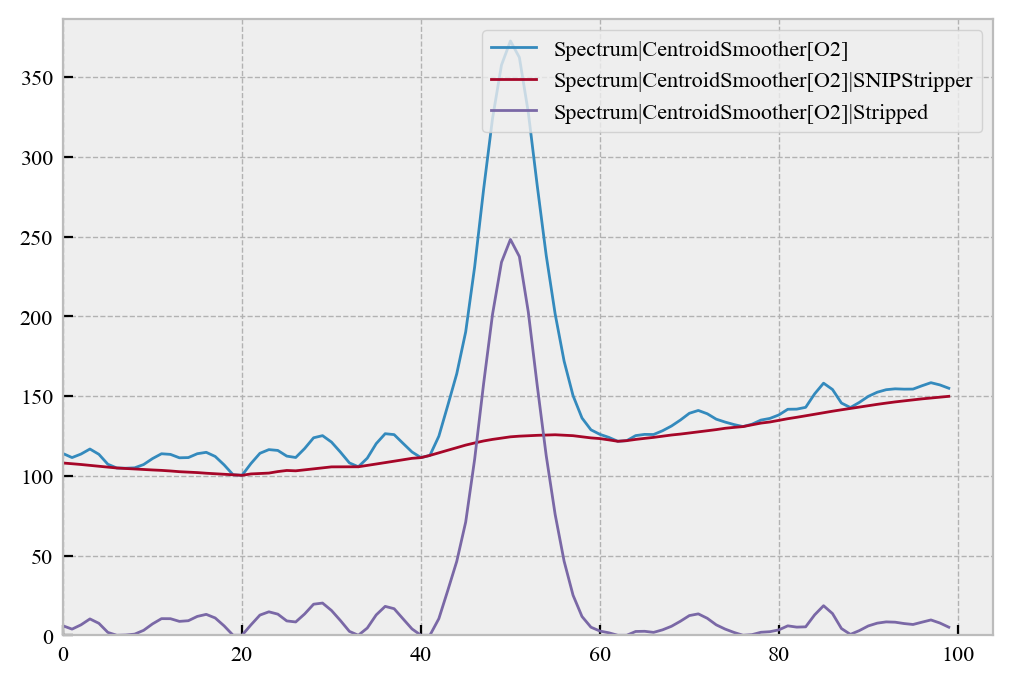

In [5]:
baseline = strip([smoothed])
stripped = smoothed - baseline
stripped.label += '|Stripped'  # the minus operator cannot add the label automatically, so we have to do it manually
smoothed.plot()
baseline.plot()
stripped.plot()
plt.legend()

Then peaks can be visualized using PeakSearcher. Note that it is actually the regions that we care about at this stage because peaks may overlap and become undistinguishable. So regions are the unit to evaluate the overlapped peaks. Here we can print the peaks list of the first region (colored deep blue), and the last peak is located at 50th channel.

e:\Gamut_dev\gamspec\operators\PeakSearcher.py:129: RuntimeWarning: invalid value encountered in sqrt
  rectified = (gaussed - 1) * searched ** 0.5


[{'location': 16},
 {'location': 22},
 {'location': 29},
 {'location': 36},
 {'location': 50}]

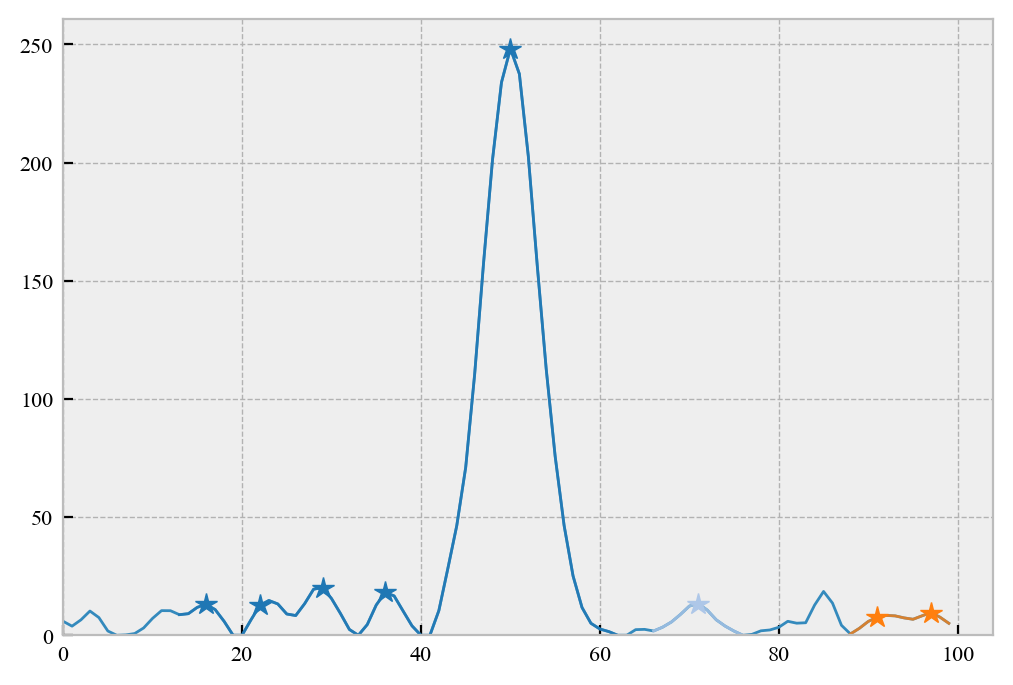

In [6]:
searched = gauss([stripped])
stripped.plot()
searched.plot_regions()
searched.regions[0].peaks
# peaks.plot_peaks()  # plot_peaks can be used only after peaks are evaluated using fitting operators

Finally we calculate the peak area using avarage full peak area method, and export data into xml report.

In [7]:
calculated = cal([searched])
calculated.export_to_xml('results_example_1.xml')
# <peak location="36" FParea="66.38" energy="36.00"/>
# <peak location="50" FParea="1957.25" energy="50.00"/>

The calculated peak area is 1957, very close to the preset value 2000, with relative error = 2.15%. Considering the statistical fluctuation on peaks = 1 / sqrt(2000) = 2.2%. The accuracy is actually satisfactory.